# Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

**Price_range is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)**

# Columns

1. Battery_power = Total energy a battery can store in one time measured in mAh
2. Blue = has bluetooth or not
3. clock_speed = speed at which microprocessor executes instructions
4. dual_sim = has dual sim support or not
5. fc = front camera megapixel
6. four_g = has 4G or not
7. int_memory = internal memory in GB
8. m_depth = mobile depth in cm
9. mobile_wt = weight
10. n_cores = number of cores of processor
11. pc = primary camera megapixel
12. px_height = pixel resolution height
13. px_width = pixel resolution width
14. ram = RAM in MB
15. sc_h = screen height in cm
16. sc_w = screen width in cm
17. talk_time = battery longevity after charging
18. three_g = has 3G or not
19. touch_screen
20. wifi
21. price_range

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# checking if any columns have null value
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
## Check unique value for each column
for i in df.columns:
    print(f"Unique value in {i}:", df[i].unique())

Unique value in battery_power: [ 842 1021  563 ... 1139 1467  858]
Unique value in blue: [0 1]
Unique value in clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique value in dual_sim: [0 1]
Unique value in fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique value in four_g: [0 1]
Unique value in int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique value in m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique value in mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181

Text(0.5, 1.0, 'Price Range Distribution')

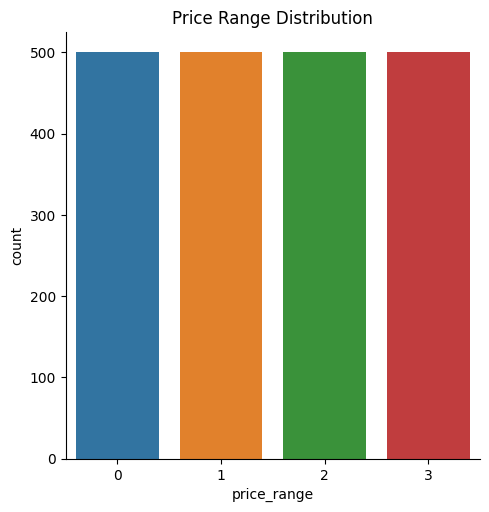

In [7]:
# Check distribution of Price Range
sns.catplot(df, x="price_range", kind="count")
plt.title("Price Range Distribution")

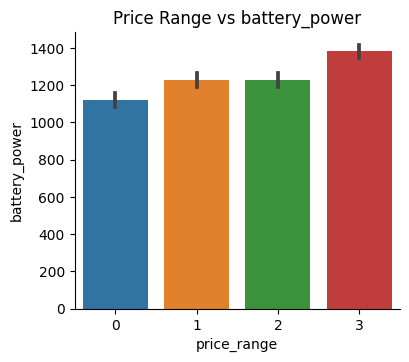

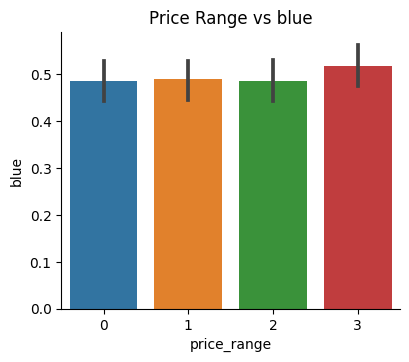

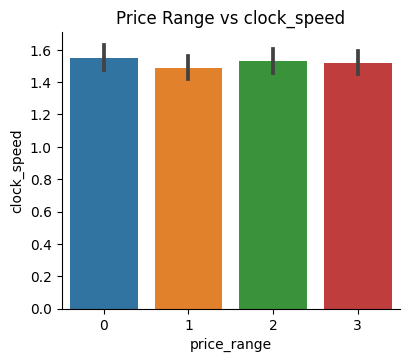

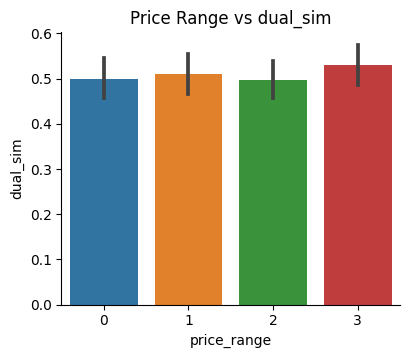

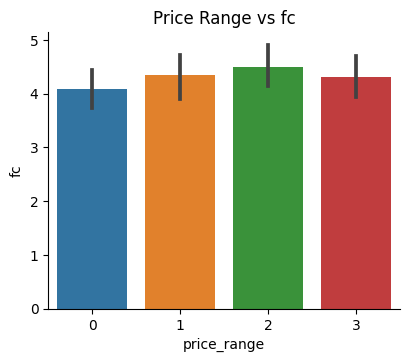

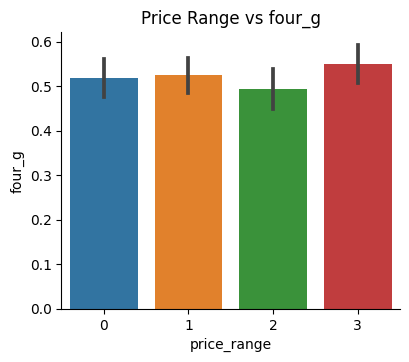

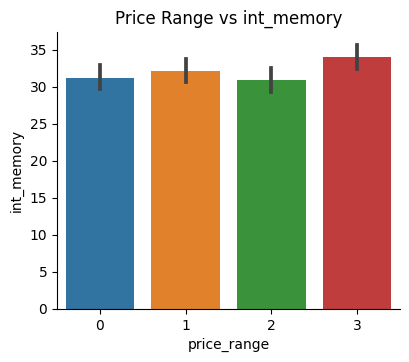

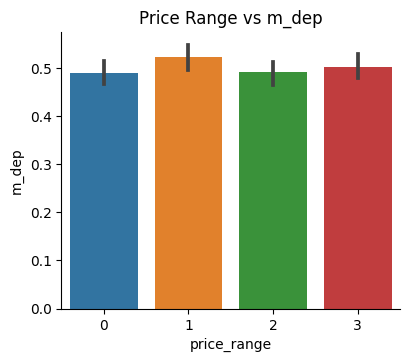

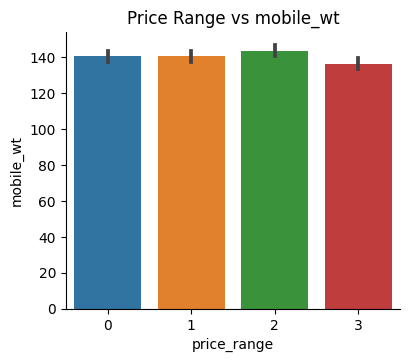

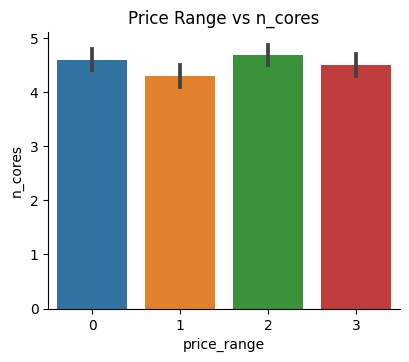

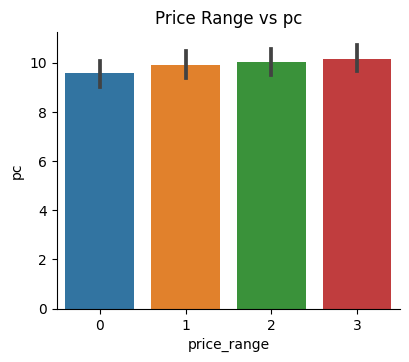

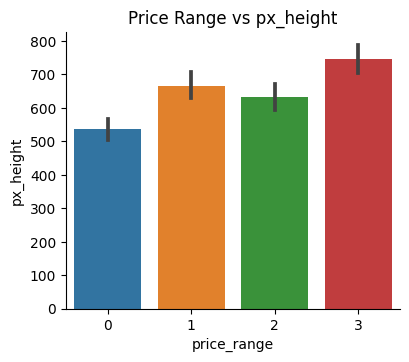

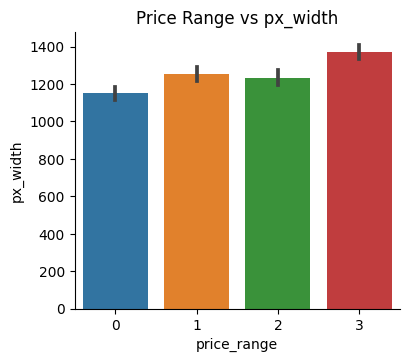

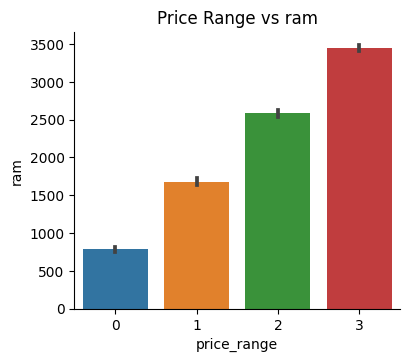

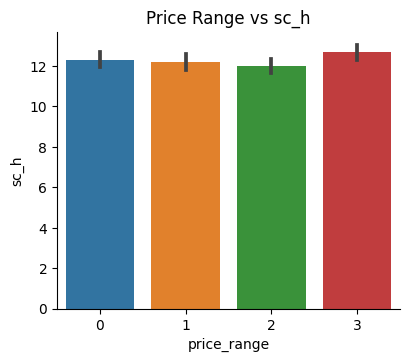

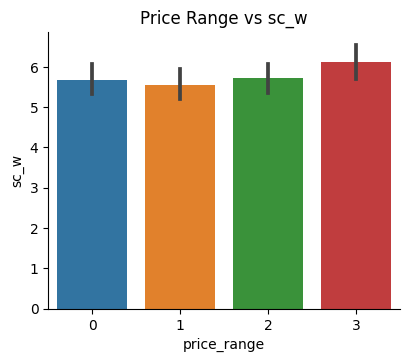

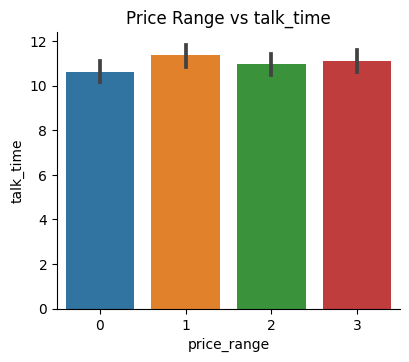

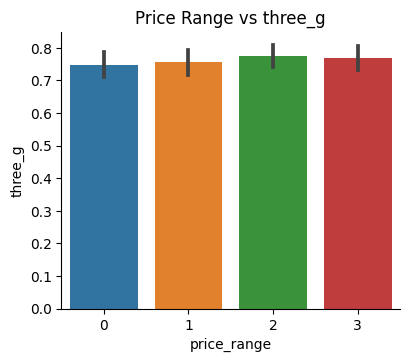

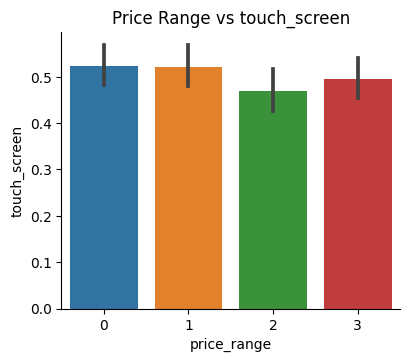

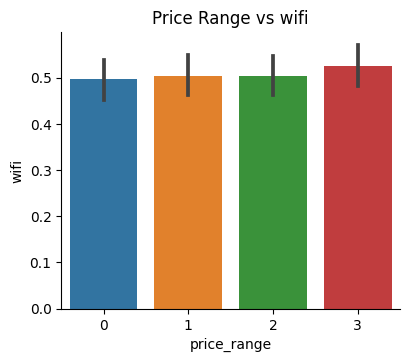

In [8]:
# Exclude price range
column = df.columns[~(df.columns == "price_range")]

# Doing looping to checking each columns to see differentiation of price_range
for i in column:
    sns.catplot(data=df, x="price_range", y=i, kind="bar", height=3.5, aspect=1.2)
    plt.title(f"Price Range vs {i}")

In [9]:
avg_by_price_range = df.groupby(["price_range"]).mean().T
print(avg_by_price_range)

price_range            0          1          2          3
battery_power  1116.9020  1228.8680  1228.3200  1379.9840
blue              0.4860     0.4900     0.4860     0.5180
clock_speed       1.5502     1.4886     1.5298     1.5204
dual_sim          0.5000     0.5100     0.4980     0.5300
fc                4.0840     4.3400     4.4980     4.3160
four_g            0.5180     0.5240     0.4940     0.5500
int_memory       31.1740    32.1160    30.9200    33.9760
m_dep             0.4902     0.5240     0.4908     0.5020
mobile_wt       140.5520   140.5100   143.6140   136.3200
n_cores           4.6000     4.2980     4.6820     4.5020
pc                9.5740     9.9240    10.0180    10.1500
px_height       536.4080   666.8920   632.2840   744.8480
px_width       1150.2700  1251.9080  1234.0460  1369.8380
ram             785.3140  1679.4900  2582.8160  3449.2320
sc_h             12.3240    12.2120    12.0100    12.6800
sc_w              5.6820     5.5440     5.7140     6.1280
talk_time     

## Price and RAM

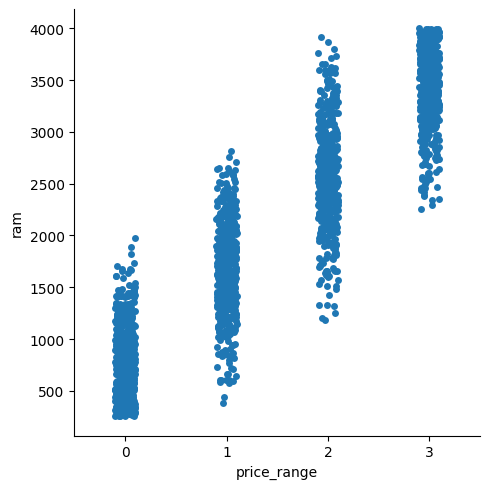

In [10]:
sns.catplot(data=df, x="price_range", y="ram")

Text(0.5, 1.0, 'Distribution Battery Power by Price Range')

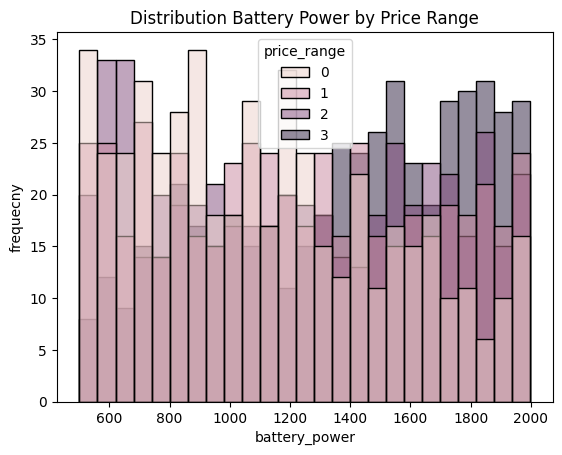

In [11]:
# Check distribution of battery power
sns.histplot(data=df, x="battery_power", hue="price_range", bins=25)


plt.xlabel("battery_power")
plt.ylabel("frequecny")
plt.title("Distribution Battery Power by Price Range")

## Price Range and Camera Megapixel

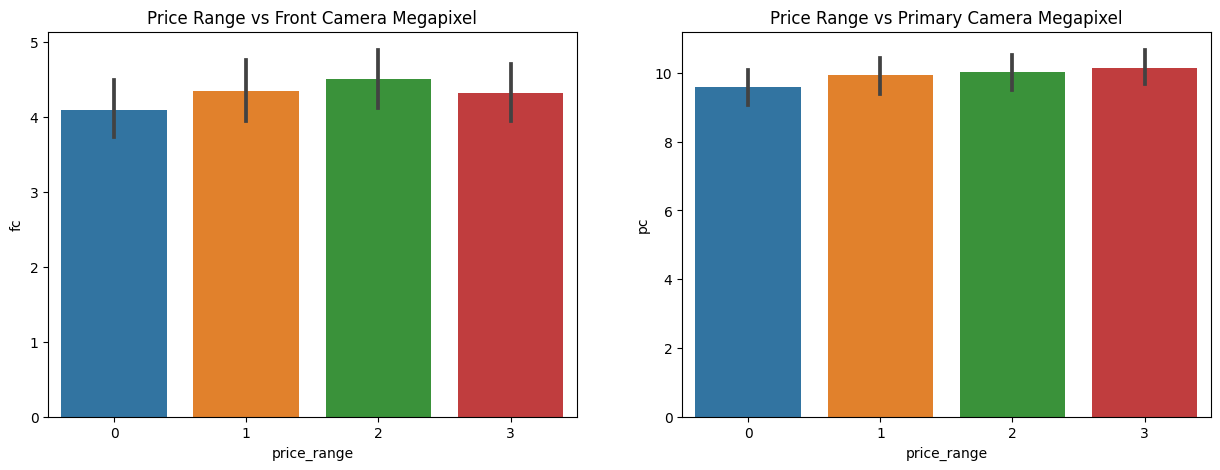

In [12]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create bar plots for 'fc' and 'pc' with specified axes
sns.barplot(data=df, ax=ax[0], x='price_range', y='fc')
sns.barplot(data=df, x='price_range', y='pc', ax=ax[1])

# Set titles for subplots
ax[0].set_title("Price Range vs Front Camera Megapixel")
ax[1].set_title("Price Range vs Primary Camera Megapixel")

# Display the plots
plt.show()

## Price Range and Internal Memory & Core Processor

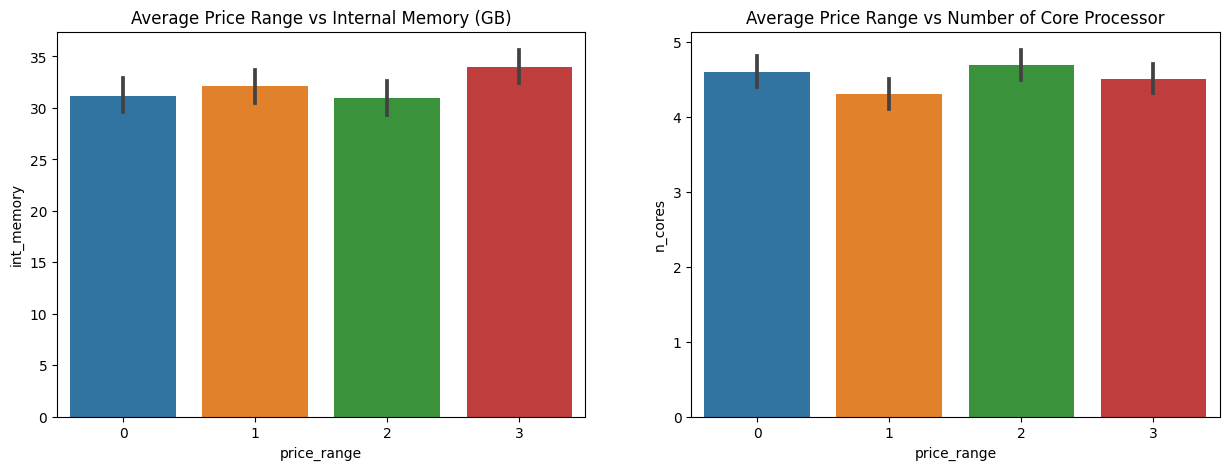

In [13]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create bar plots for 'fc' and 'pc' with specified axes
sns.barplot(data=df, ax=ax[0], x='price_range', y='int_memory')
sns.barplot(data=df, x='price_range', y='n_cores', ax=ax[1])

# Set titles for subplots
ax[0].set_title("Average Price Range vs Internal Memory (GB)")
ax[1].set_title("Average Price Range vs Number of Core Processor")

# Display the plots
plt.show()

In [14]:
print(df["int_memory"].groupby(df["price_range"]).mean().sort_values(ascending=False))
print(df["n_cores"].groupby(df["price_range"]).mean().sort_values(ascending=False))

price_range
3    33.976
1    32.116
0    31.174
2    30.920
Name: int_memory, dtype: float64
price_range
2    4.682
0    4.600
3    4.502
1    4.298
Name: n_cores, dtype: float64


## Check Outlier

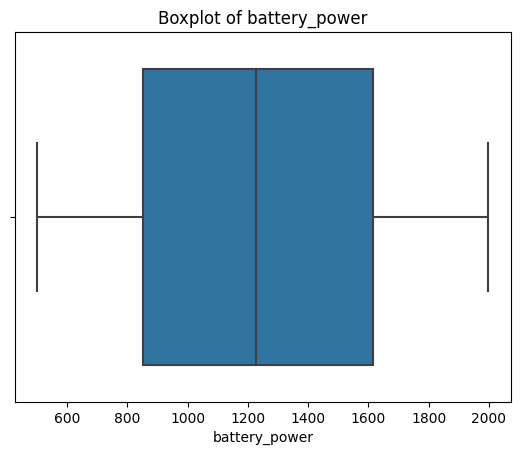

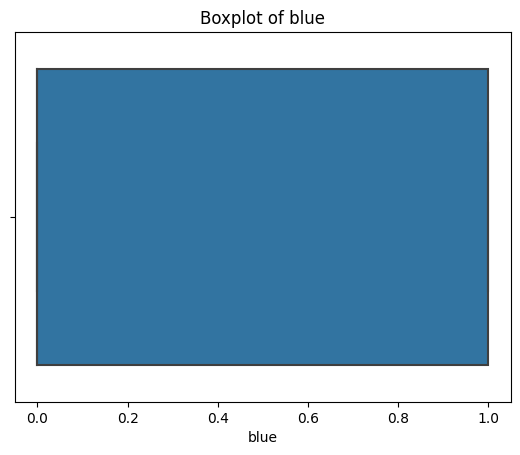

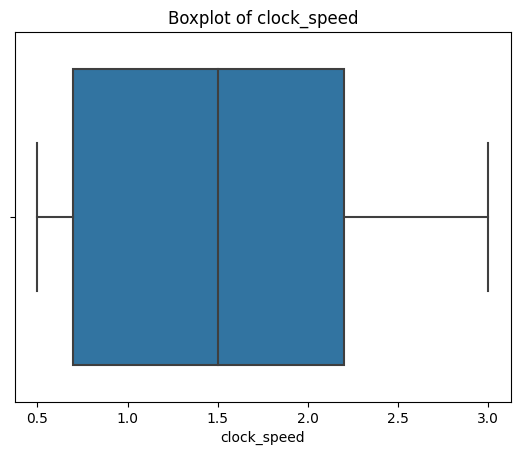

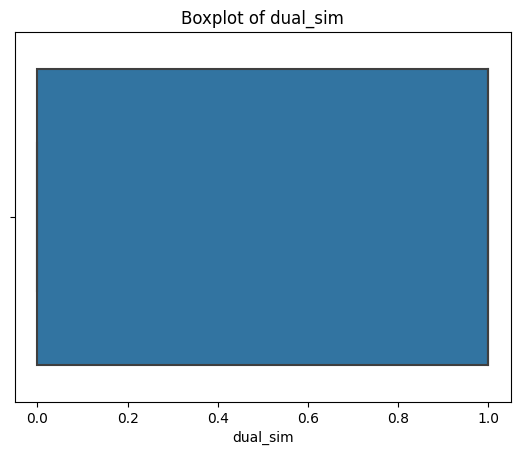

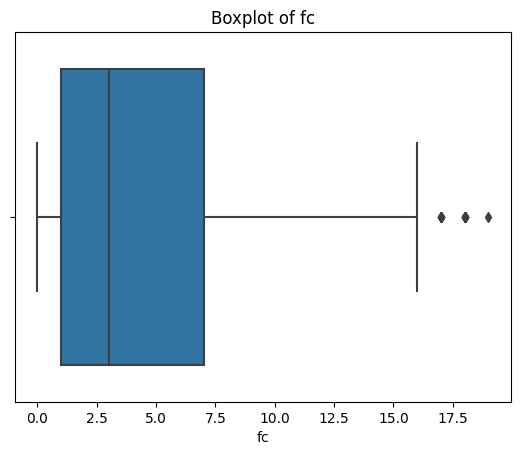

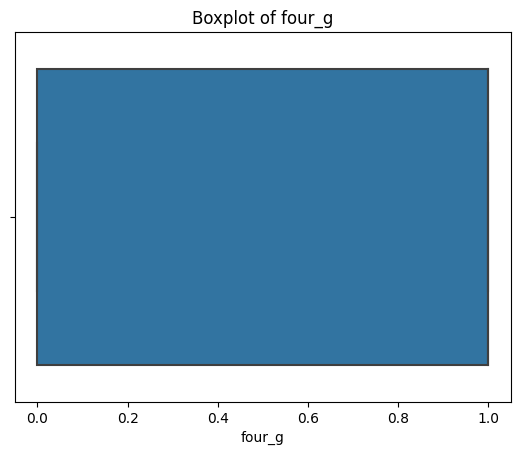

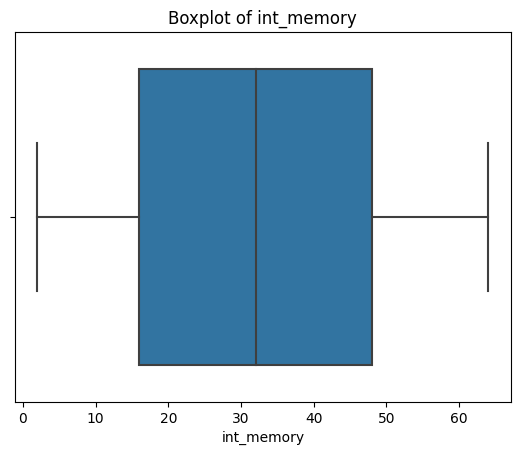

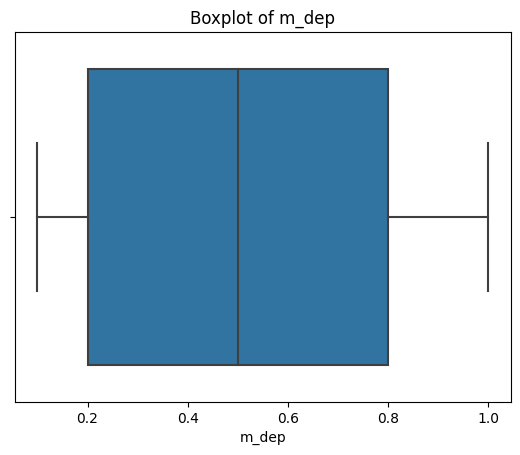

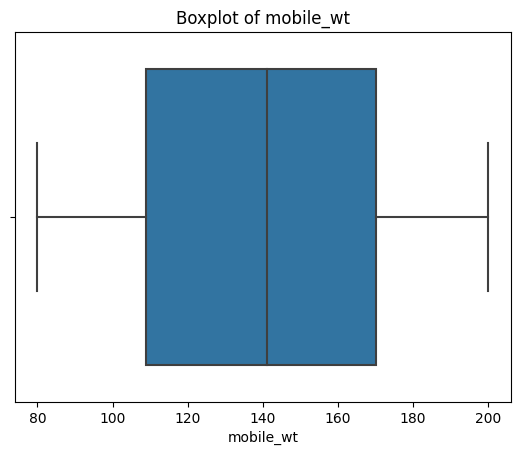

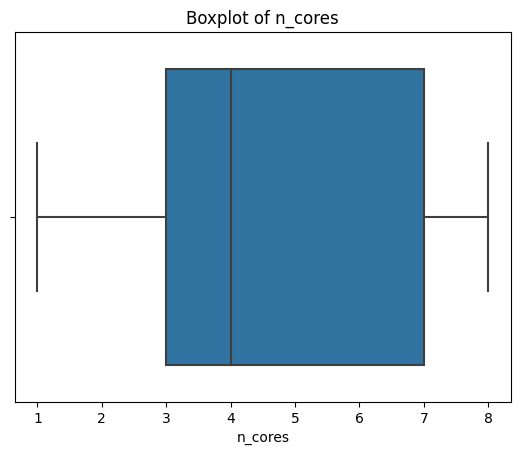

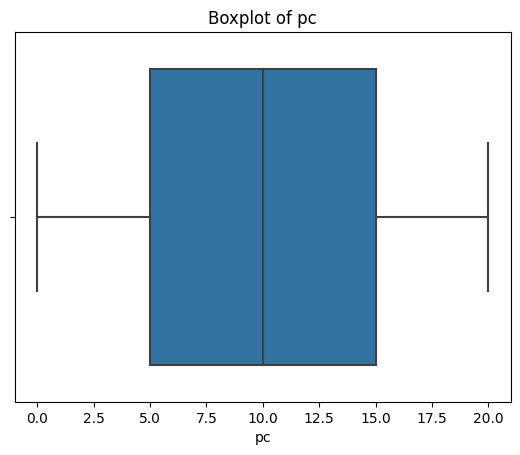

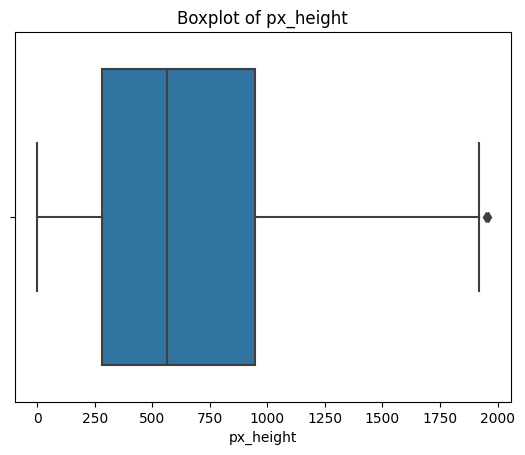

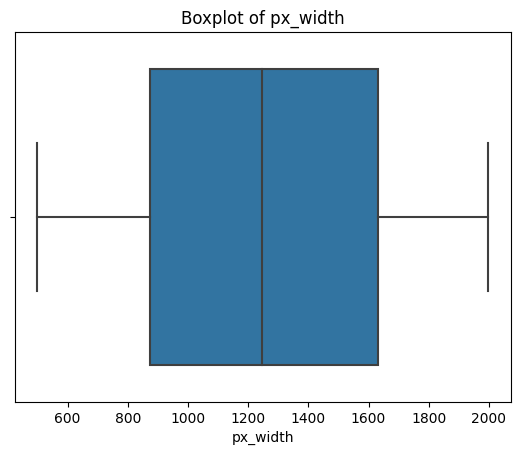

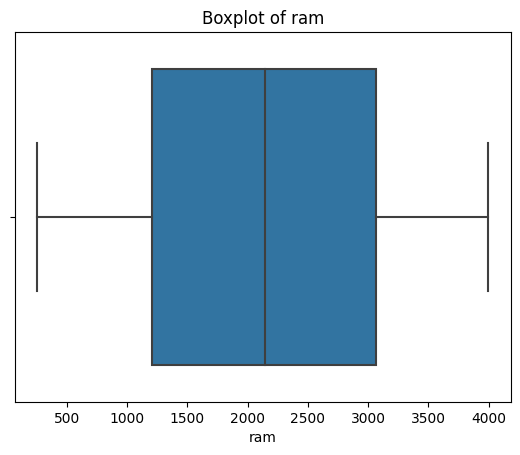

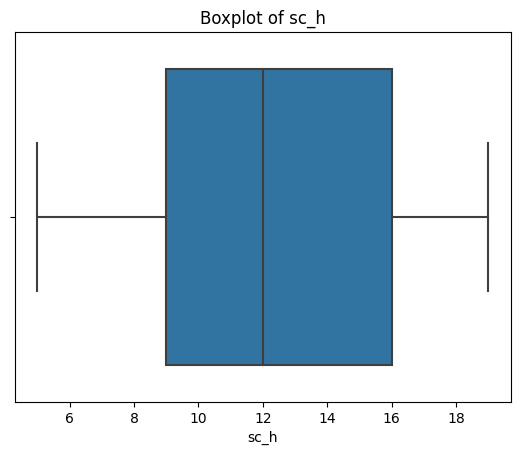

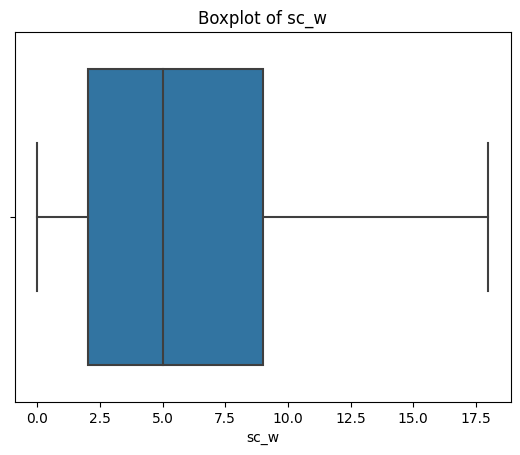

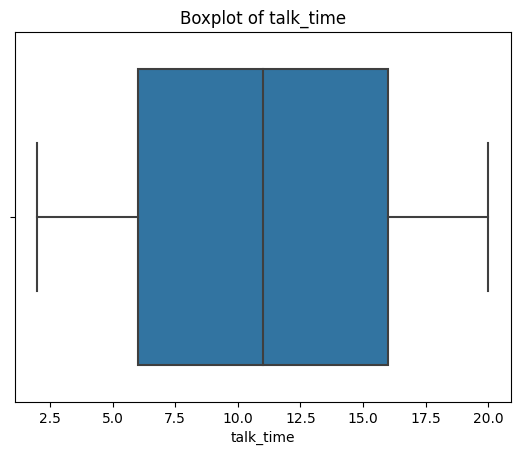

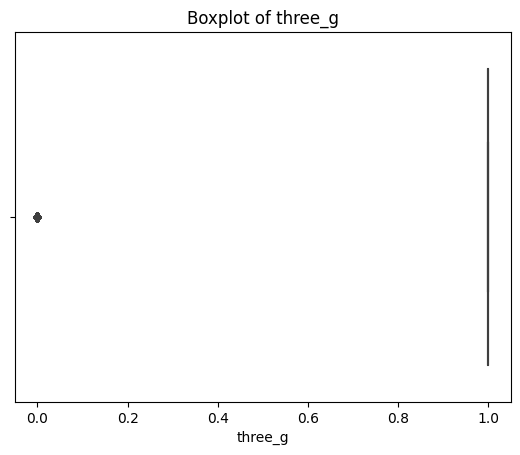

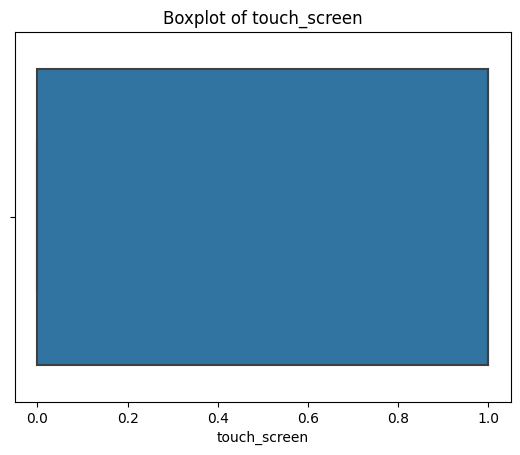

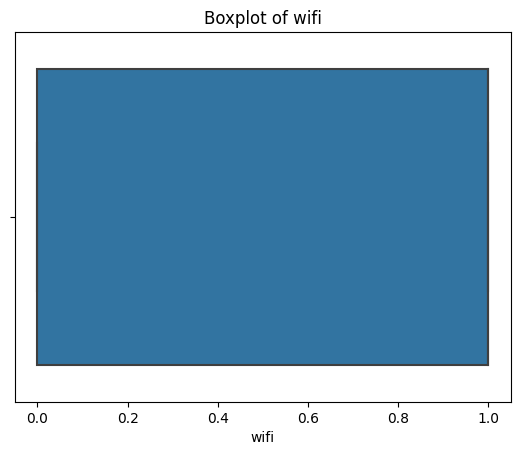

In [15]:
for i in column:
    sns.boxplot(df, x=i)
    plt.title(f"Boxplot of {i}")
    plt.show()

In [16]:
Q1 = df["fc"].quantile(0.25)
Q3 = df["fc"].quantile(0.75)
iqr = Q3 - Q1
threshold = 1.5 * iqr

outliers = df[(df["fc"] < Q1 - threshold) | (df["fc"] > Q3 + threshold)]["fc"]
print("Outliers in the 'fc' column:")
print(outliers)

Outliers in the 'fc' column:
95      18
169     17
226     18
229     17
300     17
305     18
372     17
584     17
1387    18
1406    18
1416    18
1549    17
1554    18
1693    18
1705    19
1880    18
1882    18
1888    18
Name: fc, dtype: int64


## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop("price_range", axis=1)
y = df["price_range"]

# Tentukan kolom-kolom yang hanya berisi 0 atau 1
binary_columns = [col for col in X.columns if set(X[col]) == {0, 1}]

# Tentukan kolom-kolom yang akan di-scale
columns_to_scale = [col for col in X.columns if col not in binary_columns]
columns_to_scale

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Fature Engineering

<AxesSubplot: >

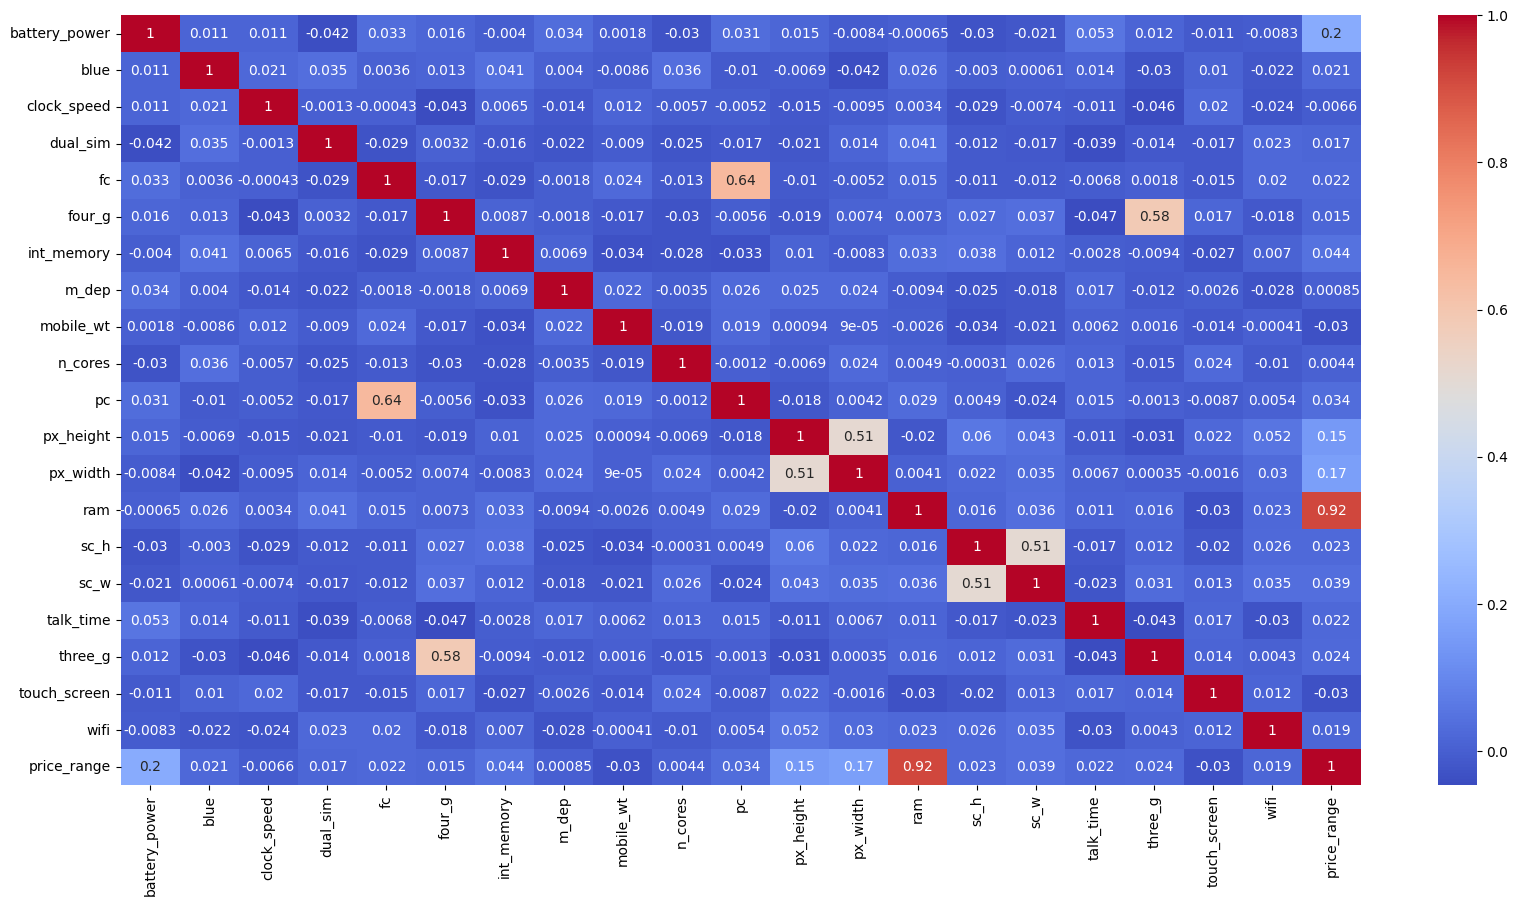

In [19]:
# Check correlation for each column
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Calculate VIF Score

In [20]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train)

vif_df = pd.DataFrame([vif(X_vif.values, i)
               for i in range(X_vif.shape[1])],
              index=X_vif.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,battery_power,1.010619
2,blue,1.012317
3,clock_speed,1.008822
4,dual_sim,1.014455
5,fc,1.691558
6,four_g,1.514505
7,int_memory,1.011550
8,m_dep,1.007915
9,mobile_wt,1.005514
10,n_cores,1.011487


* Jika VIF < 2.5: Multicollinearity rendah (tidak signifikan).
* Jika 2.5 <= VIF < 5: Multicollinearity sedang (moderat).
* Jika VIF >= 5: Multicollinearity tinggi (signifikan).

## Feature Scalling using StandardScaler()

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[columns_to_scale]
X_test[columns_to_scale]
X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale]= sc.transform(X_test[columns_to_scale])

In [22]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,0.500697,1,-1.270550,1,-0.748114,0,0.119443,0.693843,-1.593807,-0.223529,-1.123596,-0.910359,-0.525631,1.221190,-1.271991,-0.186208,-1.095663,1,1,0
1190,-0.318377,1,-1.270550,1,1.344919,0,-1.145809,0.000650,0.795943,-0.663437,0.689320,-0.420591,-1.590970,-1.268884,0.403650,-0.413811,-0.001026,0,1,0
1132,0.659082,1,0.322808,1,-0.980673,0,-1.200820,0.347246,0.995089,-0.223529,-1.453217,-1.126037,-1.639394,0.533217,0.882404,-0.186208,0.363853,1,0,1
731,1.299408,1,0.690506,0,-0.515555,0,0.944607,1.040440,-0.398932,-1.543255,0.030078,-0.714901,0.283750,-0.183538,1.121782,1.634619,0.363853,0,1,1
1754,-0.331953,1,0.200242,1,-0.980673,1,0.614541,-1.039140,-0.797224,0.656289,-1.453217,-1.346208,-0.255837,1.096779,-0.314482,-0.186208,1.093610,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,-0.628358,0,-1.270550,1,-0.050436,0,0.614541,1.387036,0.113158,0.216380,-0.299543,1.331790,0.576603,-0.623619,-0.075105,0.724205,-0.365905,1,1,1
360,-0.958703,0,-0.902852,0,1.344919,0,-0.595700,1.387036,-1.366212,1.096197,1.513373,1.792352,1.072378,-0.770312,1.361159,0.268999,-1.460541,0,0,0
1810,-1.445170,1,1.303337,0,-0.748114,0,-0.265634,-1.385736,1.620976,0.216380,-1.288406,-0.557636,-1.690125,-1.295809,1.121782,-0.186208,1.093610,0,1,1
1743,0.996215,1,0.077676,0,-0.515555,0,0.559530,0.000650,1.222684,0.216380,-0.629164,-0.991239,-1.341929,0.919447,-0.075105,-0.413811,1.640928,0,0,0


In [23]:
# Check After Scaling
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,-0.001608,0,1.671035,1,-0.748114,1,-0.430667,-0.692543,0.852842,0.216380,1.183752,-0.660982,-1.042159,-0.786095,0.882404,0.951809,0.911171,1,0,0
159,1.374075,0,-1.270550,1,1.810037,0,0.119443,0.693843,0.084708,-1.543255,1.018941,-0.773314,0.655005,-0.952286,-1.032614,-1.324225,-0.183466,0,0,0
1827,1.039205,0,0.690506,0,-0.050436,1,-1.640908,1.387036,-0.939471,-1.543255,1.183752,2.794355,1.482833,1.555428,-0.793236,-0.641415,-0.730784,1,1,1
318,-1.639756,0,-0.902852,0,0.647241,1,0.559530,-0.692543,-1.280863,-1.543255,-0.299543,-1.384401,-1.623253,-1.337588,0.164273,1.407015,-0.730784,1,0,0
708,-0.578580,1,1.548469,1,-0.515555,0,0.174453,0.347246,0.739044,-1.103346,0.854131,1.902438,1.385984,1.495079,1.600536,-0.641415,-0.183466,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.019709,1,0.077676,0,1.112359,0,0.064432,1.733633,0.511449,-1.543255,1.348562,-0.299272,-1.609417,1.571211,-0.553859,-0.186208,0.363853,1,1,0
1216,-0.169043,0,-1.025418,1,-0.748114,1,-0.155612,0.693843,-0.455831,-1.103346,1.678183,-0.773314,1.233793,-0.521490,1.121782,0.724205,0.728731,1,0,1
1653,-0.096639,0,0.567940,1,-0.980673,0,0.449508,-1.039140,-1.309313,0.216380,-1.453217,1.671033,0.887904,1.398522,0.164273,0.268999,-0.365905,0,0,1
559,-0.094376,0,1.058205,1,-0.515555,0,-1.035787,1.387036,0.852842,-1.543255,-0.464354,-1.069871,1.272994,-0.998708,0.403650,0.041395,-0.548344,1,1,1


In [31]:
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Buat pipeline untuk setiap model
models = {
    'SVM': SVC(),
    'CatBoost': CatBoostClassifier(silent=True),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'SVM': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']},
    'CatBoost': {'model__iterations': [100, 200, 300], 'model__learning_rate': [0.01, 0.1, 0.5]},
    'Random Forest': {'model__n_estimators': [10, 50, 100], 'model__max_depth': [None, 10, 20]},
    'KNN': {'model__n_neighbors': [3, 5, 7]}
}

best_model = None
best_accuracy = 0.0

for model_name, model in models.items():
    # Buat pipeline dengan StandardScaler hanya untuk kolom-kolom yang tidak hanya berisi 0 atau 1
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Buat objek GridSearchCV untuk mencari parameter terbaik
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='accuracy')
    
    # Latih model menggunakan GridSearchCV
    grid_search.fit(X_train , y_train)
    
    # Evaluasi model
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Cetak hasil evaluasi
    print(f'Model: {model_name}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    print()
    
    # Simpan model terbaik berdasarkan akurasi
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = grid_search.best_estimator_

print(f'Best Model: {best_model.named_steps["model"]}')
print(f'Best Accuracy: {best_accuracy:.2f}')

Model: SVM
Best Parameters: {'model__C': 10, 'model__kernel': 'linear'}
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.94      0.92      0.93        92
           2       0.93      0.92      0.92        99
           3       0.97      0.98      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400


Model: CatBoost
Best Parameters: {'model__iterations': 300, 'model__learning_rate': 0.1}
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.93      0.93      0.93        92
           2       0.92      0.90      0.91        99
           3       0.96      0.96      0.96       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95    

## Predict New Data

In [32]:
new_data = pd.read_csv('test.csv')
new_data = new_data.drop('id',axis=1)
new_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [33]:
# Scaling new data
new_data_scaled = new_data.copy()
new_data_scaled[columns_to_scale] = sc.transform(new_data_scaled[columns_to_scale])
new_data_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.429246,1,0.322808,1,2.275155,0,-1.475875,-1.385736,1.535628,-0.663437,1.018941,-0.964279,0.348316,1.274111,-0.075105,0.268999,-1.642981,0,1,0
1,-0.886299,1,-1.270550,1,-0.050436,1,1.604738,1.040440,1.478729,0.216380,0.359699,0.203976,-0.931474,1.663127,-1.511368,-1.324225,-0.730784,1,0,0
2,1.299408,1,1.548469,0,-0.748114,0,-0.265634,1.387036,1.336482,-0.663437,-0.958785,1.381216,0.242244,0.271397,1.121782,0.951809,-0.183466,0,1,1
3,0.708860,0,-1.270550,1,3.205392,1,-0.375656,0.000650,-1.223965,1.536106,1.678183,-0.809260,1.132332,1.661270,-0.553859,-1.324225,-0.730784,1,1,0
4,0.455445,0,-0.167456,0,1.577478,1,0.944607,0.000650,-0.882572,0.656289,1.348562,0.210715,-1.039853,-0.307021,0.643027,0.496602,-0.730784,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.057306,1,0.445374,0,-0.980673,1,1.219662,0.000650,0.881292,1.096197,1.183752,-0.025182,-0.802342,0.016076,0.403650,0.496602,0.728731,1,1,0
996,-1.411230,0,0.322808,1,-0.980673,0,-1.035787,1.387036,1.336482,-0.223529,-1.288406,1.116113,0.855621,-0.158471,-1.032614,-1.096621,1.458489,0,1,1
997,-0.107952,0,-0.167456,0,-0.748114,1,-1.310842,0.000650,-1.679155,-1.543255,0.359699,-0.400371,-1.005264,-0.817662,-1.750745,-1.324225,0.546292,1,0,0
998,0.679446,1,-1.270550,1,-0.980673,0,0.999618,-0.345947,0.909741,-1.103346,0.359699,-1.386648,-0.989122,0.376310,0.643027,1.179412,-0.913223,0,1,0


In [34]:
# check best model once more
best_model

Pipeline(steps=[('model', SVC(C=10, kernel='linear'))])

In [36]:
new_pred = best_model.predict(new_data_scaled)
new_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2,
       2, 3, 1, 2, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 3, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

## Make a new dataframe
by combining new_data (unscaled data, the original one) with the prediction result that used scaled data

In [37]:
combined_data = pd.DataFrame(data=new_data, columns=new_data.columns)  # Assuming columns in new_data match the original
combined_data['Predictions'] = new_pred

In [38]:
combined_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predictions
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [39]:
combined_data.groupby('Predictions').mean().T

Predictions,0,1,2,3
battery_power,1132.742972,1252.852174,1244.939163,1360.007752
blue,0.481928,0.521739,0.517110,0.542636
clock_speed,1.508434,1.530870,1.614829,1.505814
dual_sim,0.514056,0.482609,0.505703,0.562016
fc,4.738956,4.386957,4.920152,4.302326
four_g,0.461847,0.486957,0.486692,0.511628
int_memory,33.899598,33.665217,32.300380,34.779070
m_dep,0.493574,0.524783,0.532700,0.518605
mobile_wt,139.116466,138.965217,142.136882,137.701550
n_cores,4.522088,4.282609,4.209125,4.302326


In [40]:
# Save it to new dataset named data_predict
combined_data.to_csv('data_predicted.csv')